In [1]:
#!pip install ipynb-path
import ipynb_path
import sys 
import os
__file__ = ipynb_path.get()
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..','dbittools','Analysis','Python','read_dbit')))
import read_dbit
import scanpy as sc
import squidpy as sq
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datadir = os.path.abspath(os.path.join(os.path.dirname(__file__), '..','..','..','data','processed','A22-1650_ONH_01'))

In [3]:
adata = read_dbit.read_dbit(path=datadir, count_file='count_file.tsv', load_images=True)

/Users/mmd47/Dropbox/Workspace/OpticNerveHead_DBiT/Analysis/Python/dbittools/Analysis/Python/read_dbit/read_dbit.py:117: UserWarning: You seem to be missing an image file.
Could not find '/Users/mmd47/Dropbox/Workspace/OpticNerveHead_DBiT/data/processed/A22-1650_ONH_01/spatial/intersections_matx.txt'.
  warn(


Which file do you want to use for in_tissue column creation? These are your choices: intersections_matx.txt, tissue_hires_in_tissue_mask.pngtissue_hires_in_tissue_mask.png


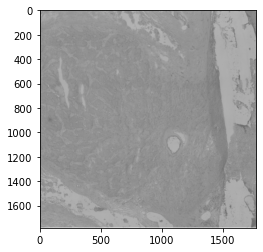

In [4]:
plt.imshow(adata.uns['spatial'][None]['images']['lowres'])

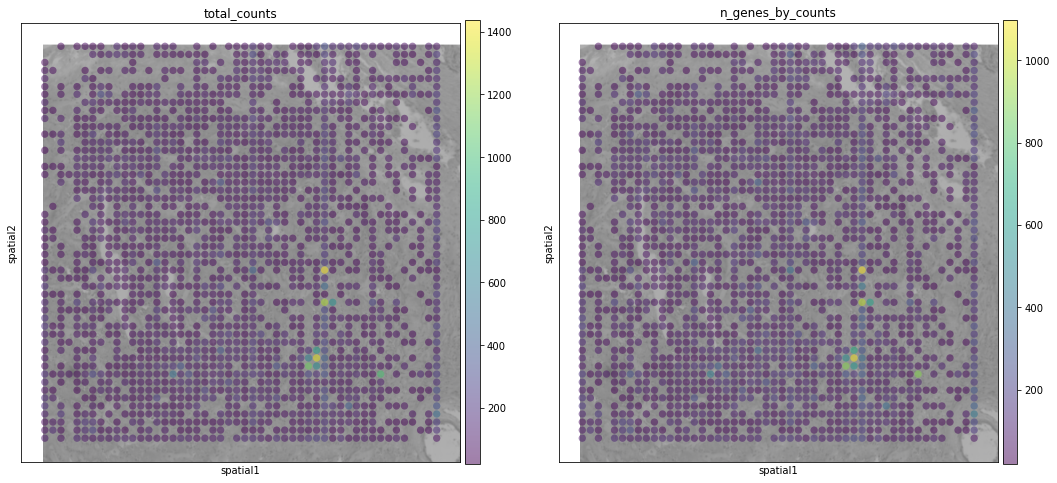

/Users/mmd47/miniconda3/envs/dbitseq/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='n_genes_by_counts'>

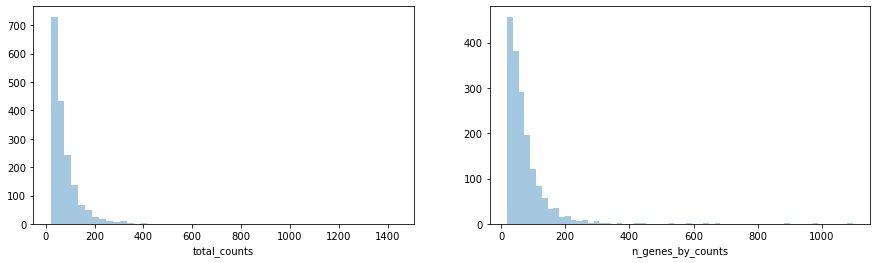

In [16]:

sc.pp.calculate_qc_metrics(adata, inplace=True)
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img=adata.uns['spatial'][None]['images']['lowres'], 
              color=["total_counts", "n_genes_by_counts"], spot_size=20, alpha=0.5)

fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[1])


In [6]:
sc.pp.filter_cells(adata, min_counts=20)
sc.pp.filter_cells(adata, max_counts=35000)
sc.pp.filter_genes(adata, min_cells=1)

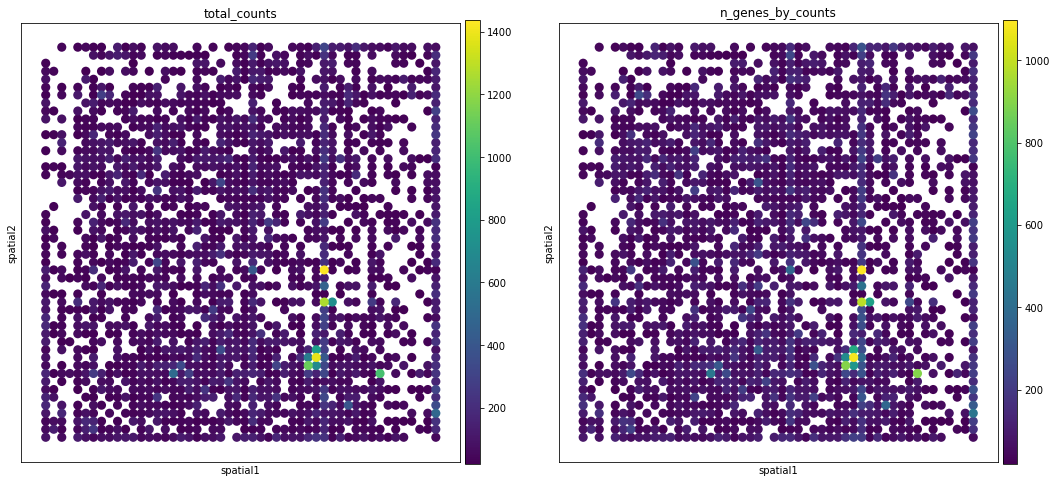

In [7]:
sc.pp.calculate_qc_metrics(adata, inplace=True)
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"], spot_size=25)

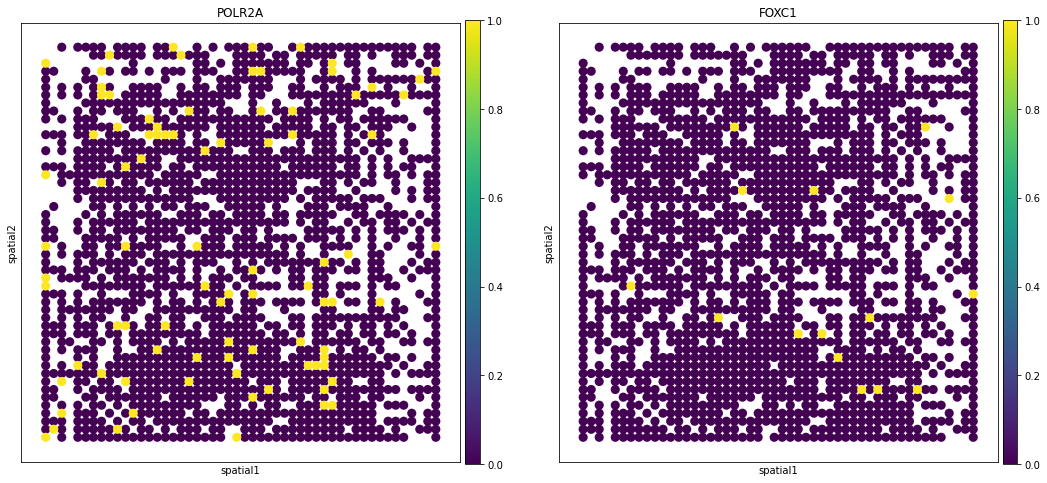

In [8]:
sc.pl.spatial(adata, img_key="hires", color=["POLR2A","FOXC1"], spot_size=25)

In [9]:
sc.pp.filter_cells(adata, min_counts=20)
sc.pp.filter_cells(adata, max_counts=35000)
sc.pp.filter_genes(adata, min_cells=1)

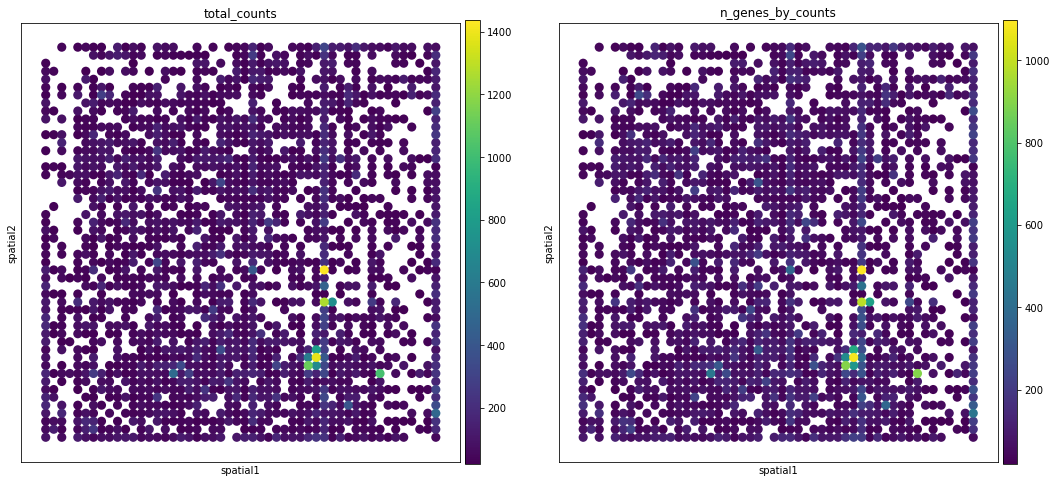

In [10]:
sc.pp.calculate_qc_metrics(adata, inplace=True)
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"], spot_size=25)

In [11]:
adata

AnnData object with n_obs × n_vars = 1741 × 5217
    obs: 'array_row', 'array_col', 'in_tissue', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'spatial'
    obsm: 'spatial'